<a href="https://colab.research.google.com/github/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/SVM_RBF_Kernel_8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
# split test train and cross validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)
X_cv,X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=43)

print("XTrain shape",X_train.shape )
print("XTest shape",X_test.shape )
print("XCv shape",X_cv.shape )

# fit RBF svc to Xtrain data
svc_clf = SVC(gamma=0.001, C= 100)
svc_clf.fit(X_train,y_train)
# support vector indices
sv_indices = svc_clf.support_
sv_dual_coeff = svc_clf.support_vectors_



XTrain shape (3000, 5)
XTest shape (1000, 5)
XCv shape (1000, 5)


In [5]:
def rbf(xi,xq, gamma):
  """
  Function to get RBF kernel value

  """
  # 𝑒𝑥𝑝(−𝛾||𝑥𝑖−𝑥𝑞||2)
  X_norm = np.sum((xi-xq) **2,axis= -1)
  return np.exp(-gamma * X_norm)

  

In [6]:
def getKernel(supportVectors, X, gamma):
  """
  Function to get Kernel Matrix
  Kernel used : RBF

  """
  Kernels = np.zeros((X.shape[0], supportVectors.shape[0]))
  for id, point in enumerate(X):
    for idx, vector in enumerate(supportVectors):
      rbf_ = rbf(point, vector, gamma)
      Kernels[id][idx] = rbf_

  return Kernels

In [7]:
def decision_function_custom(X, intercept, dual_coeff, support_vector, gamma ) :
  """
    return decison function for svm rbf kernel.

    parameters:
      X : Data
      intercept :  intercept value of classfier
      dual_coeff : dual values( alpha * y)
      support_vector : array of  support vector

    returns:
      decision function : sum_all_supoort_vectors(yi*alpha_i * Kernel(xi,xq) ) + intecept
  """
  
  Kernels = getKernel(support_vector, X,  gamma)
  decision_custom = np.sum(dual_coeff * Kernels, axis = -1) + intercept
  




  return decision_custom


In [8]:
custom_decision = decision_function_custom(X_cv,svc_clf.intercept_, svc_clf.dual_coef_, svc_clf.support_vectors_, 0.001 )


In [9]:
custom_decision

array([-4.54631892e+00, -3.18769119e+00,  1.62139697e+00,  8.61360038e-02,
        1.75246241e+00, -9.76830808e-01, -3.20246796e+00, -2.62082863e+00,
       -2.42937891e+00,  1.57993649e+00, -2.06329703e+00,  9.02139954e-01,
       -2.49633212e+00, -3.12153041e+00,  2.98793441e-01, -9.79851167e-02,
       -2.10058057e+00, -3.05987657e+00,  6.09426723e-01, -2.28247363e+00,
        1.83705137e+00, -1.49963660e+00,  1.64502533e+00,  1.74774640e+00,
        8.64699998e-01, -2.44402367e+00, -2.77765859e+00,  2.81547371e+00,
        5.69770433e-01, -2.75397962e+00, -3.38300646e+00, -2.98418538e+00,
       -3.96622930e+00, -3.17731359e+00, -2.46000821e+00, -2.51646933e+00,
       -3.78091581e+00, -2.92728890e+00,  1.55489810e+00,  1.38727315e+00,
        1.44977701e+00,  9.80246803e-01, -3.50913018e+00,  3.68527290e+00,
        9.93865029e-01,  1.64063405e+00,  1.44693130e+00, -3.46194602e+00,
       -2.92257250e+00, -3.04151815e-01, -2.88716371e+00, -2.01001616e+00,
       -2.96415173e+00, -

In [ ]:
# check the difference between sklearn svm decision function and custom decision function,
# difference between custom decision value and sklearn decision and check for indices where difference is greater than 10 ^ -6 ,
# we can see we get array of length zero
np.where(custom_decision - svc_clf.decision_function(X_cv) > 10e-6)

(array([], dtype=int64),)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [10]:

N_Positive = np.count_nonzero(y_cv)
print("Positive Count ",N_Positive)
N_negative = len(y_cv) - N_Positive
print("Negative Count ",N_negative)

Calibrated_Y_positive = (N_Positive + 1) / (N_Positive + 2)
Calibrated_Y_negative = 1 / (N_negative + 2) 

print("Calibrated_Y_positive ", Calibrated_Y_positive)
print("Calibrated_Y_negative ", Calibrated_Y_negative)

Positive Count  307
Negative Count  693
Calibrated_Y_positive  0.9967637540453075
Calibrated_Y_negative  0.0014388489208633094


In [12]:
def getCalibratedProb(Y):
  N_Positive = np.count_nonzero(Y)
  N_negative = len(Y) - N_Positive
  Calibrated_Y_positive = (N_Positive + 1) / (N_Positive + 2)
  Calibrated_Y_negative = 1 / (N_negative + 2) 

  

  return Calibrated_Y_positive, Calibrated_Y_negative


In [13]:
Calibrated_Y_positive, Calibrated_Y_negative = getCalibratedProb(y_cv)
print("Calibrated_Y_positive ", Calibrated_Y_positive)
print("Calibrated_Y_negative ", Calibrated_Y_negative)


Calibrated_Y_positive  0.9967637540453075
Calibrated_Y_negative  0.0014388489208633094


In [22]:
def updateY(Y, y_train ):
  updated_y = []
  Calibrated_Y_positive, Calibrated_Y_negative = getCalibratedProb(y_train)
  for p in Y:
    if p == 1:
      updated_y.append(Calibrated_Y_positive)
    else:
      updated_y.append(Calibrated_Y_negative)
  return updated_y

def getCalibratedProb(Y):
  N_Positive = np.count_nonzero(Y)
  N_negative = len(Y) - N_Positive
  Calibrated_Y_positive = (N_Positive + 1) / (N_Positive + 2)
  Calibrated_Y_negative = 1 / (N_negative + 2) 

  

  return Calibrated_Y_positive, Calibrated_Y_negative


In [18]:
def sigmoid(w,x,b):
  z=np.dot(x,w.T)+b
  return 1/(1+np.exp(-z))






  

In [19]:
def log_loss(W,b,X,Y): #log loss function N=len(X)
  sum_log=0
  for i in range(N):
    sum_log+=Y[i]*np.log10(sigmoid(W,X[i],b)) + (1-Y[i])*np. log10(1-sigmoid(W,X[i],b))
  return -1*sum_log/N

In [20]:
from tqdm import tqdm

In [23]:
N = len(custom_decision)
f_cv = custom_decision
w = np.zeros_like(f_cv[0],)
b = 0
eta0 = 0.001
alpha = 0.0001

cvLoss = []
EPOCH = 1
prevLoss = float("inf")
y = updateY(y_cv,y_train)
for epoch in tqdm(range(0,10)):
  
  for j in tqdm(range(N)):
    w =  ((1-((eta0*alpha)/N)) * w) + (eta0 * f_cv[j]) * (y[j] -sigmoid(w,f_cv[j],b))
    b = b + (eta0)*(y[j] - sigmoid(w,f_cv[j],b))
    loss = log_loss(w,b,f_cv,y)
    
  losss = log_loss(w,b,f_cv,y)
  cvLoss.append(losss)

   
    



100%|██████████| 10/10 [03:18<00:00, 19.85s/it]


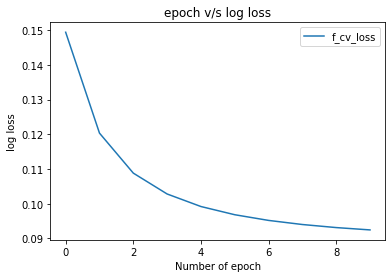

In [ ]:
import matplotlib.pyplot as plt 
epoch=np.arange(0,10) 
plt.plot(epoch,cvLoss,label='f_cv_loss')
plt.legend()
plt.xlabel("Number of epoch")
plt.ylabel("log loss")
plt.title("epoch v/s log loss")
plt.show()

In [ ]:
optimized_w = w
optimized_b = b
print(f"optimized_w {optimzed_w} optimized_b {optimized_b}" )

optimized_w 1.4530391299053644 optimized_b -0.06483497912411929


In [ ]:
f_test = decision_function_custom(X_test,svc_clf.intercept_, svc_clf.dual_coef_, svc_clf.support_vectors_, 0.001 )

In [ ]:
probs = sigmoid(optimized_w, f_test, optimized_b)
for prob in probs:
  print(prob)

0.011254124104664524
0.9224724886949968
0.21429870452893718
0.02150141964533844
0.36081756094948403
0.015766426424127743
0.010721390264799662
0.07844148870445301
0.9117209013971423
0.04107902836872616
0.7548792208371261
0.008661828833055973
0.007897685932411512
0.09209467681145618
0.015879770569701437
0.8702953364150116
0.035585594393644344
0.853835198810231
0.003658029701776787
0.11396121167281759
0.0012173560354697538
0.32875397805497963
0.03974069579328758
0.0008523765279446348
0.012346598720068618
0.033776154960870615
0.2547912187825137
0.021928702368821114
0.0040554707569128426
0.9198294435138806
0.007331343876584739
0.24633501940250552
0.3865080751855561
0.017897915355490963
0.003823976415751682
0.16434290212258532
0.011871176318126557
0.010812015662891018
0.21012500054713665
0.0369159834746769
0.017334614223640115
0.002989895746348441
0.68760091302931
0.007606910181348375
0.7712010365397645
0.9528440176942643
0.027407661020279053
0.0028619189079109077
0.05094194059862036
0.21015

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
